# SEISMIC BUMPS PREDICTION

# O. INTRODUCTION


Mining activity was and is always connected with the occurrence of dangers which are commonly called  mining hazards. A special case of such threat is a seismic hazard which frequently occurs in many  underground mines. Seismic hazard is the hardest detectable and predictable of natural hazards and in this respect it is comparable to an earthquake. 

More and more advanced seismic and seismoacoustic monitoring systems allow a better understanding rock mass processes and definition of seismic hazard prediction methods. Accuracy of so far created methods is however far from perfect. Complexity of seismic processes and big disproportion between the number of low-energy seismic events and the number of high-energy phenomena (e.g. > 10^4J) causes the statistical techniques to be insufficient to predict seismic hazard. Therefore, it is essential to search for new opportunities of better hazard prediction, also using machine learning methods. 

In the majority of applications, the results obtained by ML methods are reported in the form of two states which are interpreted as "hazardous" and "non-hazardous". Unbalanced distribution of positive ("hazardous state") and negative ("non-hazardous state") examples is a serious problem in seismic hazard prediction.

Currently used methods are still insufficient to achieve good sensitivity and specificity of predictions. In the paper (Bukowska M.: The probability of rockburst occurrence in the Upper Silesian Coal Basin area dependent on natural mining conditions. Journal of Mining Sciences, 42(6), 2006, 570-577) a number of factors having an effect on seismic hazard occurrence was proposed, among other factors, the occurrence of tremors with energy > 10^4J was listed. The task of seismic prediction can be defined in different ways, but the main aim of all seismic hazard assessment methods is to predict (with given precision relating to time and date) of increased seismic activity which can cause a rockburst. 

In the data set each row contains a summary statement about seismic activity in the rock mass within one shift (8 hours). If decision attribute has the value 1, then in the next shift any seismic bump with an energy higher than 10^4 J was registered. That task of hazards prediction bases on the relationship between the energy of recorded tremors and seismoacoustic activity with the possibility of rockburst occurrence. Hence, such hazard prognosis is not connected with accurate rockburst prediction. Moreover, with the information about the possibility of hazardous situation occurrence, an appropriate supervision service can reduce a risk of rockburst (e.g. by distressing shooting) or withdraw workers from the threatened area. Good prediction of increased seismic activity is therefore a matter of great practical importance.   

The presented data set is characterized by unbalanced distribution of positive and negative examples. In the data set there are only 170 positive examples representing class 1.

ATTRIBUTE INFORMATION:
1. **seismic**: result of shift seismic hazard assessment in the mine working obtained by the seismic method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);
2. **seismoacoustic**: result of shift seismic hazard assessment in the mine working obtained by the  seismoacoustic method;
3. **shift**: information about type of a shift (W - coal-getting, N -preparation shift);
4. **genergy**: seismic energy recorded within previous shift by the most active geophone (GMax) out of geophones monitoring the longwall;
5. **gpuls**: a number of pulses recorded within previous shift by GMax;
6. **gdenergy**: a deviation of energy recorded within previous shift by GMax from average energy recorded  during eight previous shifts;
7. **gdpuls**: a deviation of a number of pulses recorded within previous shift by GMax from average number of pulses recorded during eight previous shifts;
8. **ghazard**: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming from GMax only;
9. **nbumps**: the number of seismic bumps recorded within previous shift;
10. **nbumps2**: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift;
11. **nbumps3**: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift;
12. **nbumps4**: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift;
13. **nbumps5**: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift;
14. **nbumps6**: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift;
15. **nbumps7**: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift;
16. **nbumps89**: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift;
17. **energy**: total energy of seismic bumps registered within previous shift;
18. **maxenergy**: the maximum energy of the seismic bumps registered within previous shift;
19. **class**: the decision attribute - "1" means that high energy seismic bump occurred in the next shift ("hazardous state"), "0" means that no high energy seismic bumps occurred in the next shift ("non-hazardous state").

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import scipy
from scipy.io import arff
import scipy.stats as stats
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import f1_score, accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

#settings
%matplotlib inline

# 1. LOADING DATASET

In [3]:
dataset_path='./dataset/'
filename = 'seismic-bumps.arff'

data = arff.loadarff(dataset_path+filename)
df = pd.DataFrame(data[0])
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [4]:
# Decoding bytes to UTF-8

object_columns = df.select_dtypes(include=['object']).columns
for col in df.columns:
     if col in object_columns:
         df[col] = df[col].str.decode("utf-8")

In [5]:
df = df.rename(columns={'class': 'risk_class'})

# 2. EXPLORATORY DATA ANALYSIS

## 2.1 STATISTICS AND DATA CONSISTENCY

In [6]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,risk_class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
cols = ['shift','seismic','seismoacoustic','ghazard','genergy','gpuls','gdenergy','gdpuls','energy','maxenergy','nbumps','nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7','nbumps89','risk_class']

In [8]:
df = df[cols]

In [9]:
df.head()

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class
0,N,a,a,a,15180.0,48.0,-72.0,-72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,N,a,a,a,14720.0,33.0,-70.0,-79.0,2000.0,2000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,N,a,a,a,8050.0,30.0,-81.0,-78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,N,a,a,a,28820.0,171.0,-23.0,40.0,3000.0,3000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,N,a,a,a,12640.0,57.0,-63.0,-52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### Features types:   N.4 categorial   N.6 continous   N.8 discrete


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shift           2584 non-null   object 
 1   seismic         2584 non-null   object 
 2   seismoacoustic  2584 non-null   object 
 3   ghazard         2584 non-null   object 
 4   genergy         2584 non-null   float64
 5   gpuls           2584 non-null   float64
 6   gdenergy        2584 non-null   float64
 7   gdpuls          2584 non-null   float64
 8   energy          2584 non-null   float64
 9   maxenergy       2584 non-null   float64
 10  nbumps          2584 non-null   float64
 11  nbumps2         2584 non-null   float64
 12  nbumps3         2584 non-null   float64
 13  nbumps4         2584 non-null   float64
 14  nbumps5         2584 non-null   float64
 15  nbumps6         2584 non-null   float64
 16  nbumps7         2584 non-null   float64
 17  nbumps89        2584 non-null   f

#### No missing values in the data set. 

In [11]:
df.describe()

,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0
mean,9.024252e+04,538.579334,12.375774,4.508901,4975.270898,4278.850619,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0
std,2.292005e+05,562.652536,80.319051,63.166556,20450.833222,19357.454882,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,5.283250e+04,669.000000,38.000000,30.250000,2600.000000,2000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
max,2.595650e+06,4518.000000,1245.000000,838.000000,402000.000000,400000.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0


#### Several features with a high range of values
#### nbumps6, nbumps7, nbumps89: columns with no values

## 2.1.1 Checking for duplicated rows

In [12]:
print('Numbers of duplicated rows in dataset: ',(df.duplicated() == True).sum())

Numbers of duplicated rows in dataset:  6


In [13]:
df[df.duplicated()==True]

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class
89,N,a,a,a,63550.0,325.0,15.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
90,W,a,a,a,194580.0,697.0,-35.0,-32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
972,N,a,b,a,5250.0,66.0,-49.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
973,N,a,b,a,19420.0,60.0,98.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1017,N,a,a,a,590.0,11.0,-74.0,-72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1018,N,a,a,a,3720.0,43.0,75.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### Since it is very unlikely that two shifts recorded exactly the same data, duplicate rows are dropped.

In [14]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shift           2578 non-null   object 
 1   seismic         2578 non-null   object 
 2   seismoacoustic  2578 non-null   object 
 3   ghazard         2578 non-null   object 
 4   genergy         2578 non-null   float64
 5   gpuls           2578 non-null   float64
 6   gdenergy        2578 non-null   float64
 7   gdpuls          2578 non-null   float64
 8   energy          2578 non-null   float64
 9   maxenergy       2578 non-null   float64
 10  nbumps          2578 non-null   float64
 11  nbumps2         2578 non-null   float64
 12  nbumps3         2578 non-null   float64
 13  nbumps4         2578 non-null   float64
 14  nbumps5         2578 non-null   float64
 15  nbumps6         2578 non-null   float64
 16  nbumps7         2578 non-null   float64
 17  nbumps89        2578 non-null   f

## 2.1.2 Checking for inconsistent rows

In [15]:
# Bump count
df[df['nbumps'] != df[['nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7','nbumps89']].sum(axis=1)] 


,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class
434,N,b,a,a,5500.0,152.0,-51.0,-1.0,250.0,200.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
435,N,a,a,a,4630.0,89.0,-56.0,-42.0,50.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
# dropping inconsistency rows
df = df.drop((df[df['nbumps'] != df[['nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7','nbumps89']].sum(axis=1)]).index)

# resetting dataframe indexes
df = df.reset_index(drop=True)


In [17]:
df[df['maxenergy'] > df['energy']] 

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class


no inconsistency between energy and maxenergy

In [18]:
df_nbumps = df[df['nbumps'] > 0]
df_nbumps[df_nbumps['energy'] <= 0]


,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class


no inconsistency

In [19]:
df_nbumps = df[df['nbumps2'] > 0]
df_nbumps[df_nbumps['maxenergy'] < 10^2]


,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class


no inconsistency

In [20]:
df_nbumps = df[df['nbumps3'] > 0]
df_nbumps[df_nbumps['maxenergy'] < 10^3]


,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class


no inconsistency

In [21]:
df_nbumps = df[df['nbumps4'] > 0]
df_nbumps[df_nbumps['maxenergy'] < 10^4]


,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class


no inconsistency

In [22]:
df_nbumps = df[df['nbumps5'] > 0]
df_nbumps[df_nbumps['maxenergy'] < 10^5]


,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,risk_class


no inconsistency

no values > 0 for nbumps6, nbumps7 and nbumps89 as shown in "describe" table and in next section graphs

## 2.2 LABEL AND FEATURE DISTRIBUTIONS AND CORRELATIONS

#### Columns grouping by feature type.

In [23]:
label = 'risk_class'
categorial_features= ['shift','seismic','seismoacoustic', 'ghazard']
continous_features = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
discrete_features = ['nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89']

### LABEL

In [24]:
df['risk_class'].value_counts()

risk_class
0    2407
1     169
Name: count, dtype: int64

In [25]:

(df['risk_class'].value_counts() / float(len(df))).round(2)

risk_class
0    0.93
1    0.07
Name: count, dtype: float64

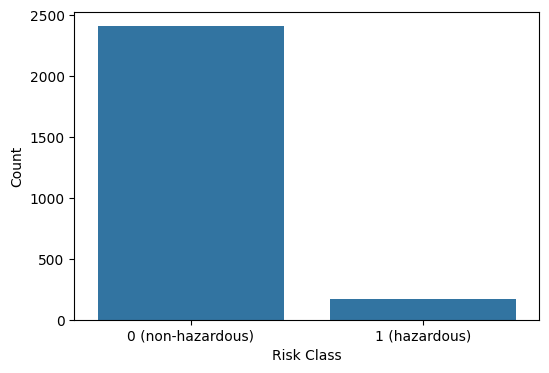

In [26]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='risk_class', data=df)
plt.xticks([0, 1], ['0 (non-hazardous)', '1 (hazardous)'],rotation=0)
plt.xlabel("Risk Class")
plt.ylabel("Count")
plt.show()

### CATEGORIAL FEATURES

 #### - SEISMIC 

In [27]:
df['seismic'].value_counts()

seismic
a    1675
b     901
Name: count, dtype: int64

In [28]:
(df['seismic'].value_counts() / float(len(df))).round(2)

seismic
a    0.65
b    0.35
Name: count, dtype: float64

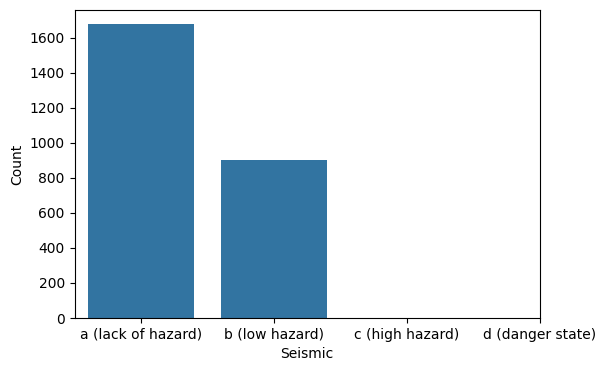

In [29]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='seismic', data=df)
plt.xticks([0,1,2,3],['a (lack of hazard)', 'b (low hazard)', 'c (high hazard)', 'd (danger state)'], rotation=0 )
plt.xlabel("Seismic")
plt.ylabel("Count")
plt.show()


#### Values for c (high hazard) and d (danger state) are equal to zero.

In [30]:
# Crosstab tables are used to display the frequency distribution of two or more categorical variables. 
# They are used to summarize the relationship between the variables by showing the counts or frequencies of the unique 
# combinations of categories from each variable. Crosstab tables help identify patterns, correlations, 
# or associations between variables.

ctab_seismic = pd.crosstab(df['seismic'], df[label])
ctab_seismic

risk_class,0,1
seismic,,
a,1593,82
b,814,87


In [31]:
ctab_seismic_norm = ctab_seismic.div(ctab_seismic.sum(1).astype(float), axis=0)
ctab_seismic_norm.round(2)

risk_class,0,1
seismic,,
a,0.95,0.05
b,0.90,0.10


#### Shifts with a low seismic risk are slightly more likely (about 5%) to be followed by shifts with strong seismic bumps, than those reported with no risk 

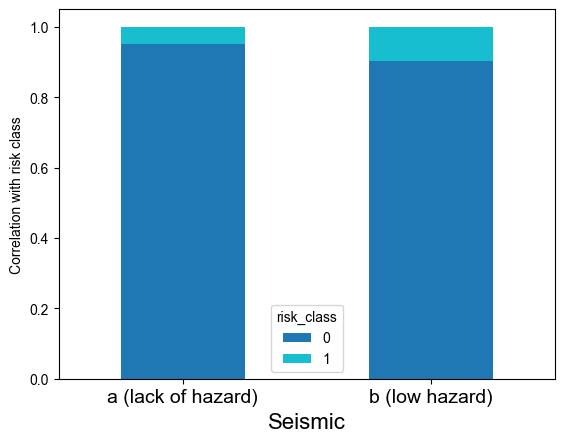

In [32]:
ctab_seismic_norm.plot(kind = 'bar', stacked = True, colormap='tab10')
sns.set_theme(style="darkgrid")
plt.xlabel('Seismic', fontsize=16)
plt.ylabel("Correlation with risk class")
plt.xticks(fontsize=16, rotation=0)
plt.xticks([0, 1], ['a (lack of hazard)', 'b (low hazard)'], fontsize=14, rotation=0)
plt.show()

#### - SEISMOACOUSTIC 

In [33]:
df['seismoacoustic'].value_counts()

seismoacoustic
a    1574
b     954
c      48
Name: count, dtype: int64

In [34]:
(df['seismoacoustic'].value_counts() / float(len(df))).round(2)

seismoacoustic
a    0.61
b    0.37
c    0.02
Name: count, dtype: float64

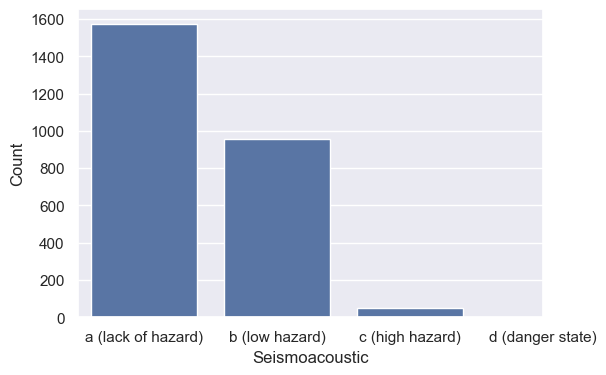

In [35]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='seismoacoustic', data=df)
plt.xticks([0,1,2,3],['a (lack of hazard)', 'b (low hazard)', 'c (high hazard)', 'd (danger state)'], rotation=0 )
plt.xlabel("Seismoacoustic")
plt.ylabel("Count")
plt.show()

#### no shift with danger state

In [36]:
ctab_seismoacoustic = pd.crosstab(df['seismoacoustic'], df[label])
ctab_seismoacoustic


risk_class,0,1
seismoacoustic,,
a,1474,100
b,888,66
c,45,3


In [37]:
ctab_seismocoustic_norm = ctab_seismoacoustic.div(ctab_seismoacoustic.sum(1).astype(float), axis=0)
ctab_seismocoustic_norm.round(2)

risk_class,0,1
seismoacoustic,,
a,0.94,0.06
b,0.93,0.07
c,0.94,0.06


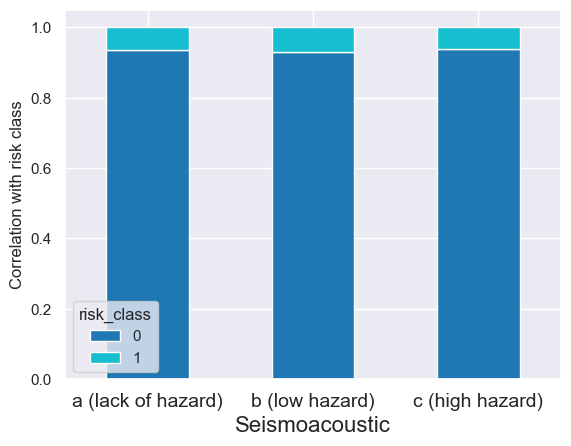

In [38]:
ctab_seismocoustic_norm.plot(kind = 'bar', stacked = True, colormap='tab10')
sns.set_theme(style="darkgrid")
plt.xlabel('Seismoacoustic', fontsize=16)
plt.ylabel("Correlation with risk class")
plt.xticks(fontsize=16, rotation=0)
plt.xticks([0, 1, 2], ['a (lack of hazard)', 'b (low hazard)', 'c (high hazard)'], fontsize=14, rotation=0)
plt.show()

#### No relevant correlation

#### - SHIFT 

In [39]:
df['shift'].value_counts()

shift
W    1662
N     914
Name: count, dtype: int64

In [40]:
(df['shift'].value_counts() / float(len(df))).round(2)

shift
W    0.65
N    0.35
Name: count, dtype: float64

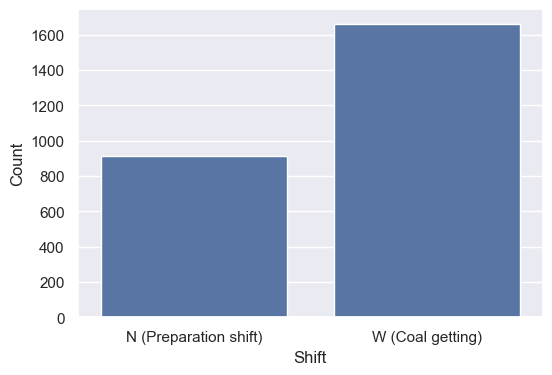

In [41]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='shift', data=df)
plt.xticks([0,1],['N (Preparation shift)','W (Coal getting)'], rotation=0 )
plt.xlabel("Shift")
plt.ylabel("Count")
plt.show()

In [42]:
ctab_shift = pd.crosstab(df['shift'], df[label])
ctab_shift

risk_class,0,1
shift,,
N,898,16
W,1509,153


In [43]:
ctab_shift_norm = ctab_shift.div(ctab_shift.sum(1).astype(float), axis=0)
ctab_shift_norm.round(2)

risk_class,0,1
shift,,
N,0.98,0.02
W,0.91,0.09


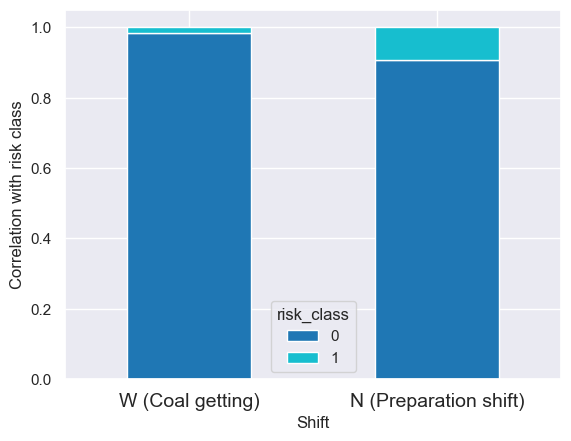

In [44]:
ctab_shift_norm.plot(kind = 'bar', stacked = True, colormap='tab10')
sns.set_theme(style="darkgrid")
plt.xlabel('Shift')
plt.ylabel("Correlation with risk class")
plt.xticks(fontsize=16, rotation=0)
plt.xticks([0, 1], ['W (Coal getting)', 'N (Preparation shift)'], fontsize=14, rotation=0)
plt.show()

#### - GHAZARD  
#### Result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming form GMax only

In [45]:
df['ghazard'].value_counts()

ghazard
a    2334
b     212
c      30
Name: count, dtype: int64

In [46]:
(df['ghazard'].value_counts() / float(len(df))).round(2)

ghazard
a    0.91
b    0.08
c    0.01
Name: count, dtype: float64

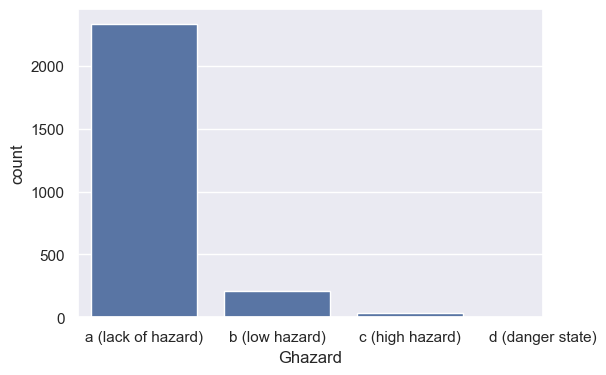

In [47]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='ghazard', data=df)
plt.xticks([0,1,2,3],['a (lack of hazard)', 'b (low hazard)', 'c (high hazard)', 'd (danger state)'], rotation=0 )
plt.xlabel("Ghazard")
plt.show()

In [48]:
ctab_ghazard = pd.crosstab(df['ghazard'], df[label])
ctab_ghazard

risk_class,0,1
ghazard,,
a,2179,155
b,198,14
c,30,0


In [49]:
ctab_ghazard_norm = ctab_ghazard.div(ctab_ghazard.sum(1).astype(float), axis=0)
ctab_ghazard_norm.round(2)

risk_class,0,1
ghazard,,
a,0.93,0.07
b,0.93,0.07
c,1.00,0.00


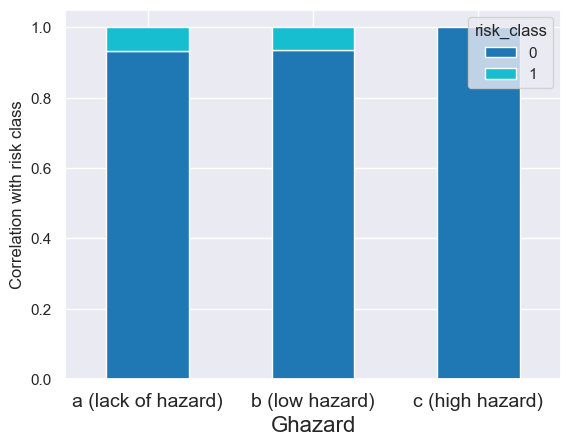

In [50]:
ctab_ghazard_norm.plot(kind = 'bar', stacked = True, colormap='tab10')
sns.set_theme(style="darkgrid")
plt.xlabel('Ghazard', fontsize=16)
plt.ylabel("Correlation with risk class")
plt.xticks(fontsize=16, rotation=0)
plt.xticks([0, 1, 2], ['a (lack of hazard)', 'b (low hazard)', 'c (high hazard)'], fontsize=14, rotation=0)
plt.show()

#### No relevant correlation

### CONTINOUS FEATURES

#### - GENERGY  
#### seismic energy recorded within previous shift by the most active geophone (GMax) monitoring the longwall

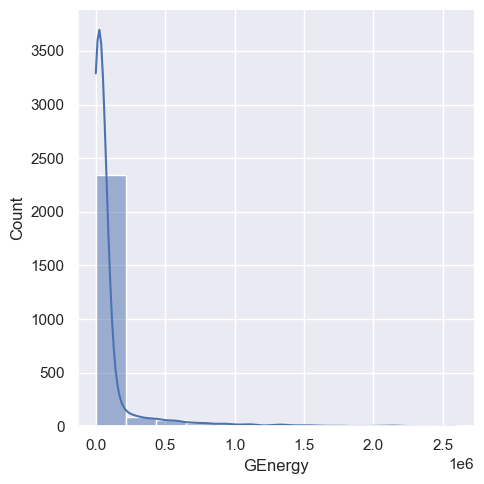

In [51]:
sns.displot(data=df, x="genergy", kde= 'true',  bins=12)
plt.xlabel('GEnergy')
plt.show()

#### GEnergy has a skewed distribution. In order to obtain a more clear range of values for analysis, a logarithmic transformation is applied. The same approach will be used for features with values that exhibit the same characteristic

In [52]:
df['log_genergy'] = np.log(df['genergy'])

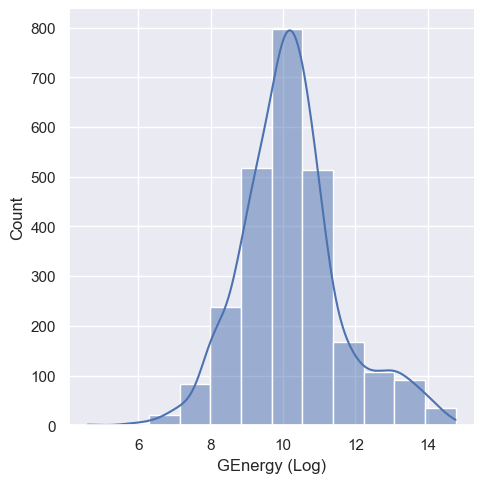

In [53]:
sns.displot(data=df, x="log_genergy", kde=True, bins=12)
plt.xlabel('GEnergy (Log)')
plt.show()

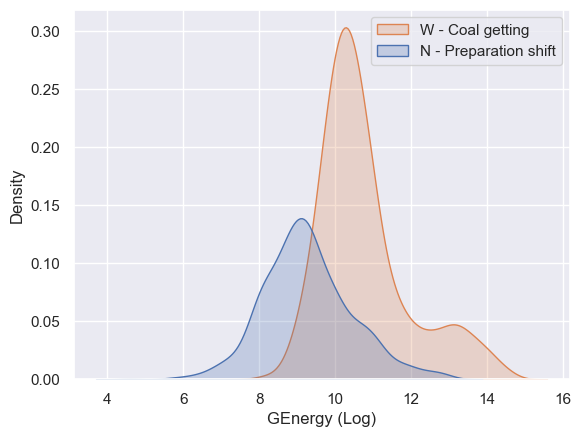

In [54]:
sns.kdeplot(data = df, x='log_genergy', hue="shift", fill = True)
plt.legend(["W - Coal getting","N - Preparation shift"],loc='upper right')
plt.xlabel('GEnergy (Log)')
plt.ylabel('Density')
plt.show()

#### Plotting the GEnergy distributions for the two types of shifts, it can be observed that the first distribution, related to preparation shifts, has a lower average energy density. In the second, the higher peak is associated with the presence of a greater number of coal extraction shifts compared to preparation ones in the dataset 

#### - GPULS  
#### Total number of pulses recorded within previous shift by GMax

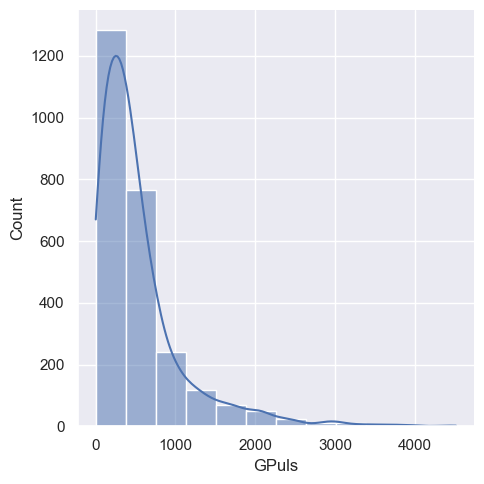

In [55]:
sns.displot(data=df, x="gpuls", kde= 'true',  bins=12)
plt.xlabel('GPuls')
plt.show()

#### Log-trasformation for GPuls

In [56]:
df['log_gpuls'] = np.log(df['gpuls'])

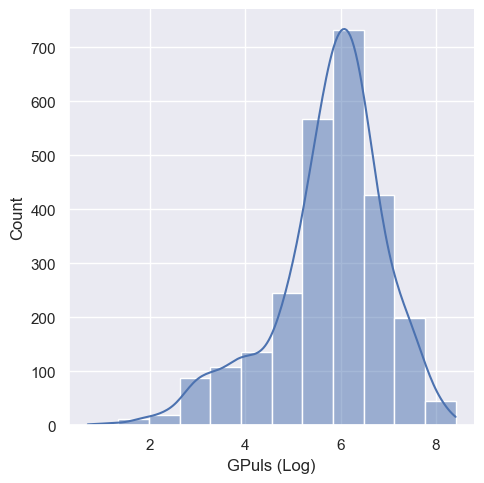

In [57]:
sns.displot(data=df, x="log_gpuls", kde=True, bins=12)
plt.xlabel('GPuls (Log)')
plt.show()

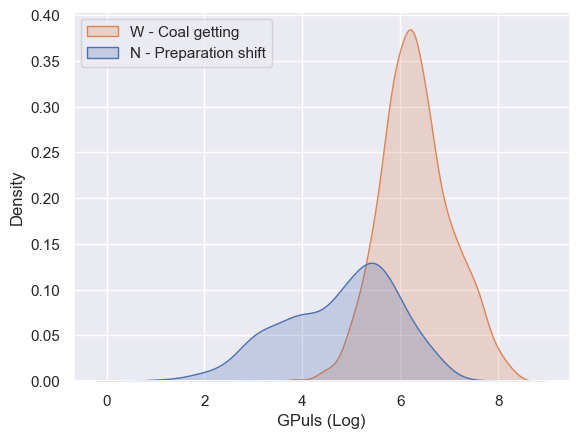

In [58]:
sns.kdeplot(data = df, x='log_gpuls', hue="shift", fill = True)
plt.legend(["W - Coal getting","N - Preparation shift"],loc='upper left')
plt.xlabel('GPuls (Log)')
plt.ylabel('Density')
plt.show()

#### Coal-getting activity produces a greater number of seismic pulses (and a greater seismic energy pulses as seen in previous diagram).

#### - GDENERGY  
#### Deviation of  energy recorded within previous shift by GMax from average energy recorded during eight previous shifts

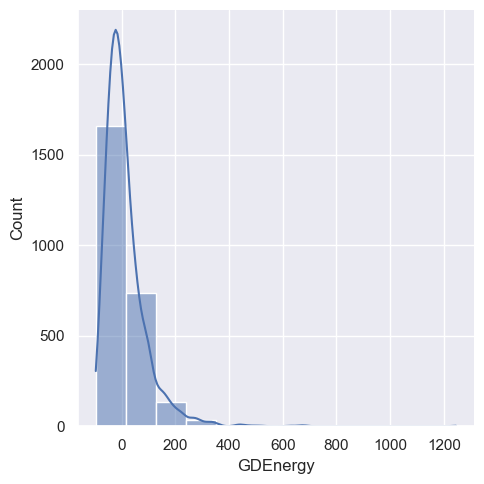

In [59]:
sns.displot(data=df, x="gdenergy", kde= 'true',  bins=12)
plt.xlabel('GDEnergy')
plt.show()

#### In order to obtain a more clear distribution of GDEnergy, it is conveninet to use a logarithmic transformation as seen before. 
#### In this case, since negative values are present, an initial transformation is required to shift values and make them all positive.

In [60]:
min_gdenergy = min(df['gdenergy']) 
df['log_shifted_gdenergy'] = np.log(df['gdenergy'] + np.abs(min_gdenergy) + 1)

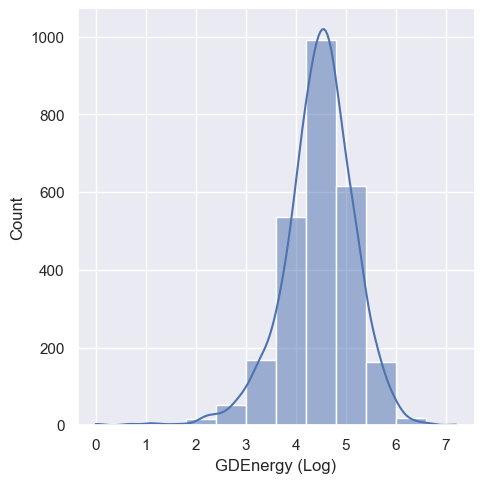

In [61]:
sns.displot(data=df, x='log_shifted_gdenergy', kde= 'true',  bins=12)
plt.xlabel('GDEnergy (Log)')
plt.show()

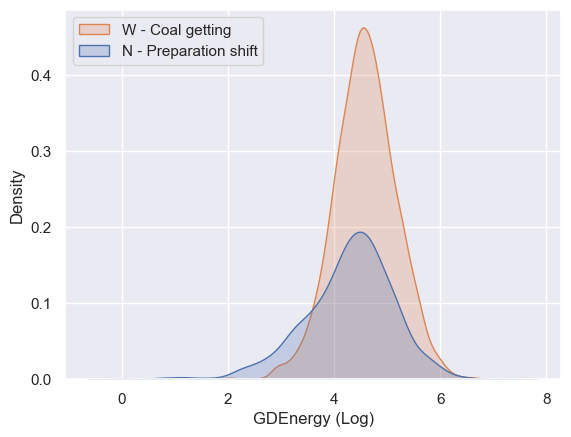

In [62]:
sns.kdeplot(data = df, x='log_shifted_gdenergy', hue="shift", fill = True)
plt.legend(["W - Coal getting","N - Preparation shift"],loc='upper left')
plt.xlabel('GDEnergy (Log)')
plt.ylabel('Density')
plt.show()

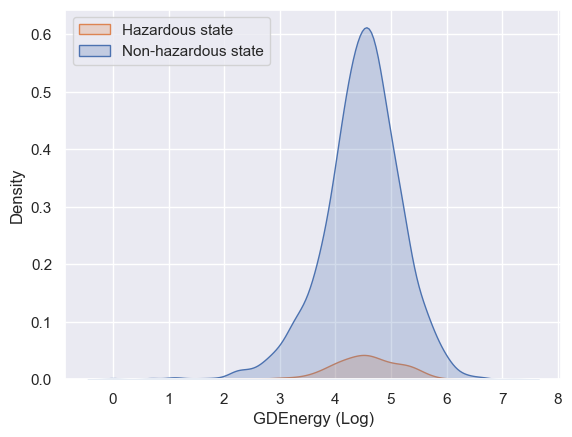

In [63]:
sns.kdeplot(data = df, x='log_shifted_gdenergy', hue="risk_class", fill = True)
plt.legend(["Hazardous state","Non-hazardous state"],loc='upper left')
plt.xlabel('GDEnergy (Log)')
plt.ylabel('Density')
plt.show()



#### Feature that singularly doesn't appear discriminative.

#### - GDPuls  
#### Deviation of the number of pulses recorded by GMax from the average number of pulses recorded during the previous eight shifts.

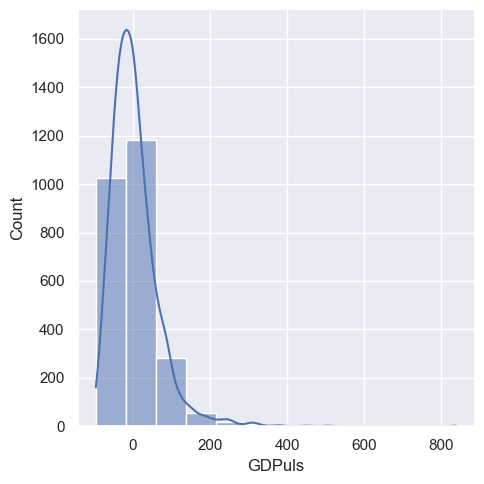

In [64]:
sns.displot(data=df, x="gdpuls", kde= 'true',  bins=12)
plt.xlabel('GDPuls')
plt.show()

#### Similar situation as GDEnergy, so an analogous trasformation is applied

In [65]:
min_gdpuls = min(df['gdpuls']) 
df['log_shifted_gdpuls'] = np.log(df['gdpuls'] + np.abs(min_gdenergy) + 1)

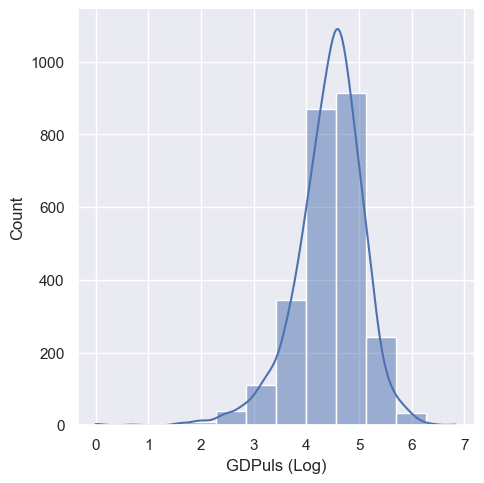

In [66]:
sns.displot(data=df, x='log_shifted_gdpuls', kde= 'true',  bins=12)
plt.xlabel('GDPuls (Log)')
plt.show()

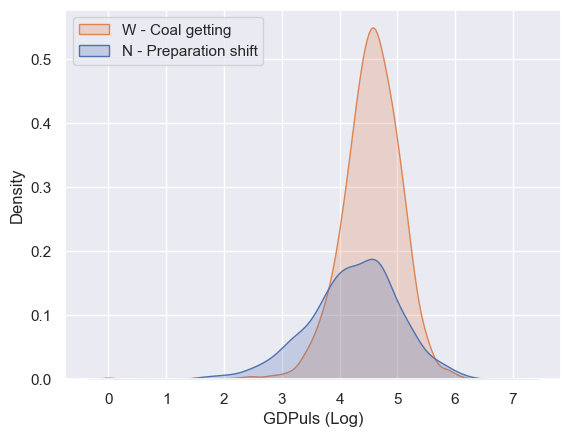

In [67]:
sns.kdeplot(data = df, x='log_shifted_gdpuls', hue="shift", fill = True)
plt.legend(["W - Coal getting","N - Preparation shift"],loc='upper left')
plt.xlabel('GDPuls (Log)')
plt.ylabel('Density')
plt.show()

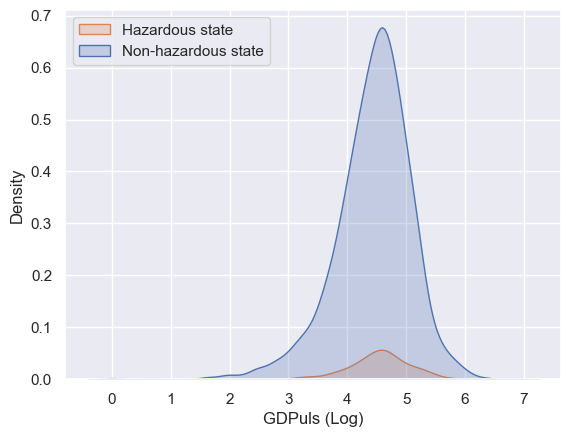

In [68]:
sns.kdeplot(data = df, x='log_shifted_gdpuls', hue="risk_class", fill = True)
plt.legend(["Hazardous state","Non-hazardous state"],loc='upper left')
plt.xlabel('GDPuls (Log)')
plt.ylabel('Density')
plt.show()

#### Feature that singularly doesn't appear discriminative.

#### - ENERGY  
#### total energy of seismic bumps registered within previous shift by geophones

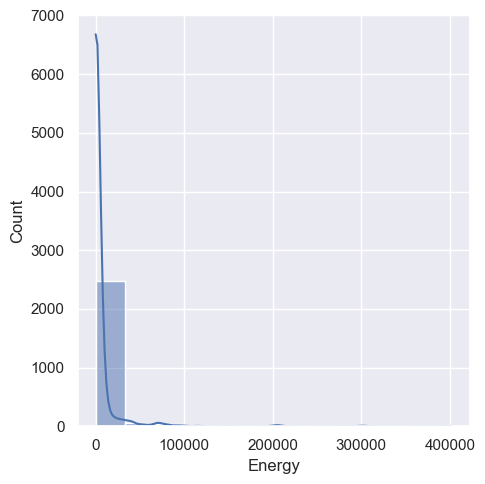

In [111]:

sns.displot(data=df, x="energy", kde= 'true',  bins=12)
plt.xlabel('Energy')
plt.show()

#### Also in this case we have a skewed distribution, concentrated on the left side. This is because most samples refer to shifts during which no seismic events occurred, so the total energy value is 0. 
#### The variable range is between 0 and 402000, so in order to obtain a more understandable energy distribution graph, we add 1 to the energy value for each sample and then we apply the logarithmic transformation. 

In [70]:
df['log_shifted_energy'] = np.log(df['energy'] + 1)

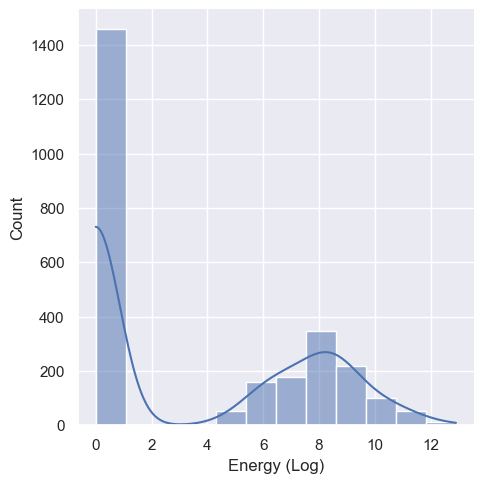

In [71]:
sns.displot(data=df, x='log_shifted_energy', kde= 'true',  bins=12)
plt.xlabel('Energy (Log)')
plt.show()

#### As can be seen, the new log-energy distribution shows two peaks: the first corresponds to the samples where no seismic events occurred, while the second peak corresponds to the distribution of records where one or more seismic bumps were recorded.

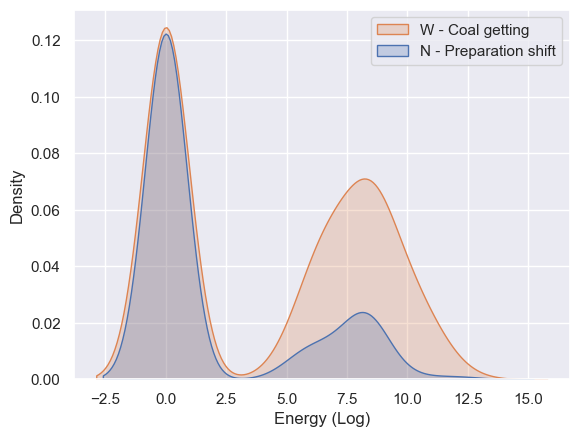

In [72]:
sns.kdeplot(data = df, x='log_shifted_energy', hue="shift",fill = True)
plt.legend(["W - Coal getting","N - Preparation shift"],loc='upper right')
plt.xlabel('Energy (Log)')
plt.ylabel('Density')
plt.show()

#### In the last graph distribution of log-energy divided according to the shift type. While  the first peak is homogeneously composed by the two types of shift, the second peak presents a much higher density of coal-getting shift.  This is due to the fact that the 64.5% of the samples consist of coal getting shift but also because it is more likely that one or more seismic bumps occurred in that type of shift.

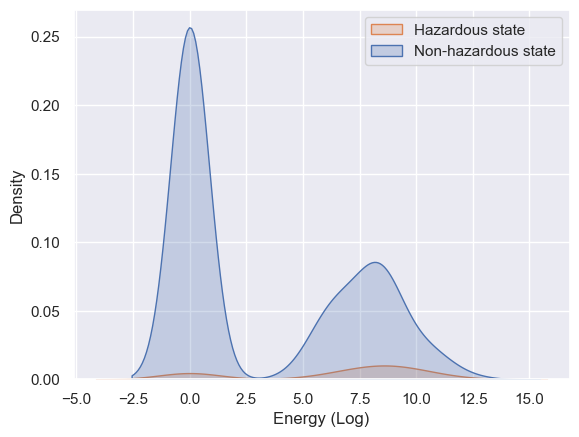

In [73]:
sns.kdeplot(data = df, x='log_shifted_energy', hue="risk_class",fill = True)
plt.legend(["Hazardous state","Non-hazardous state"],loc='upper right')
plt.xlabel('Energy (Log)')
plt.ylabel('Density')
plt.show()

#### - MAXENERGY maximum value of energy released by a seismic bumps occurred during a shift 

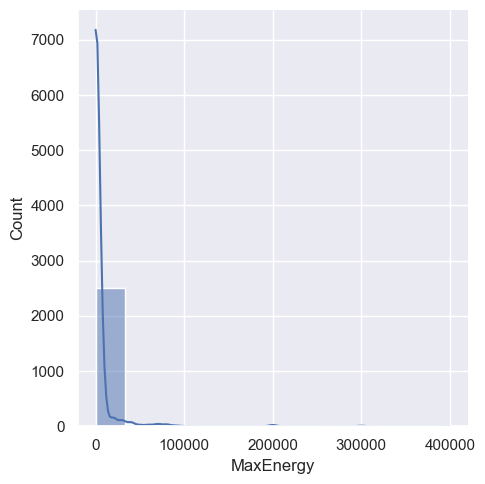

In [74]:
sns.displot(data=df, x="maxenergy", kde= 'true',  bins=12)
plt.xlabel('MaxEnergy')
plt.show()

In [75]:
df['log_shifted_maxenergy'] = np.log(df['maxenergy'] + 1)

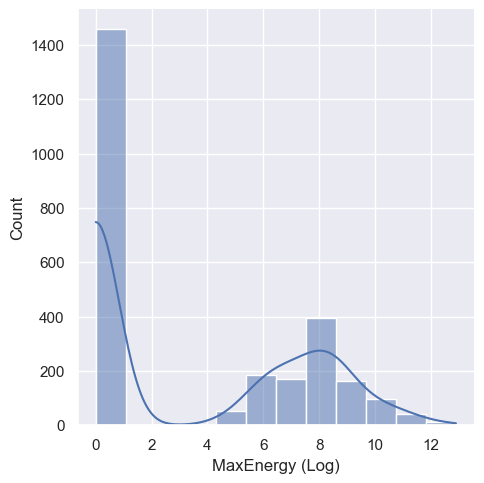

In [76]:
sns.displot(data=df, x='log_shifted_maxenergy', kde= 'true',  bins=12)
plt.xlabel('MaxEnergy (Log)')
plt.show()

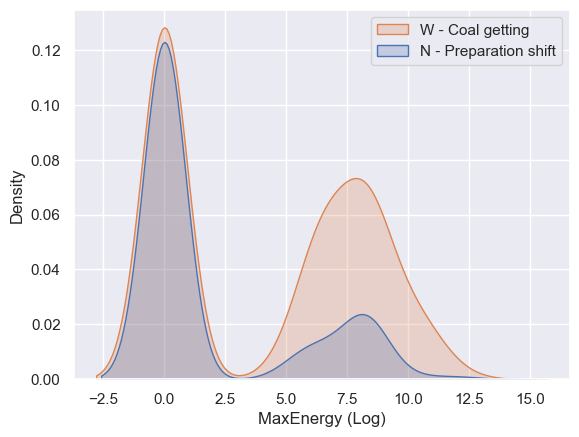

In [77]:
sns.kdeplot(data = df, x='log_shifted_maxenergy', hue="shift",fill = True)
plt.legend(["W - Coal getting","N - Preparation shift"],loc='upper right')
plt.xlabel('MaxEnergy (Log)')
plt.ylabel('Density')
plt.show()

#### Since maxenergy is a fraction of energy (and often most of it), the two variables are highly correlated, as shown by distribution plots

### DISCRETE FEATURES

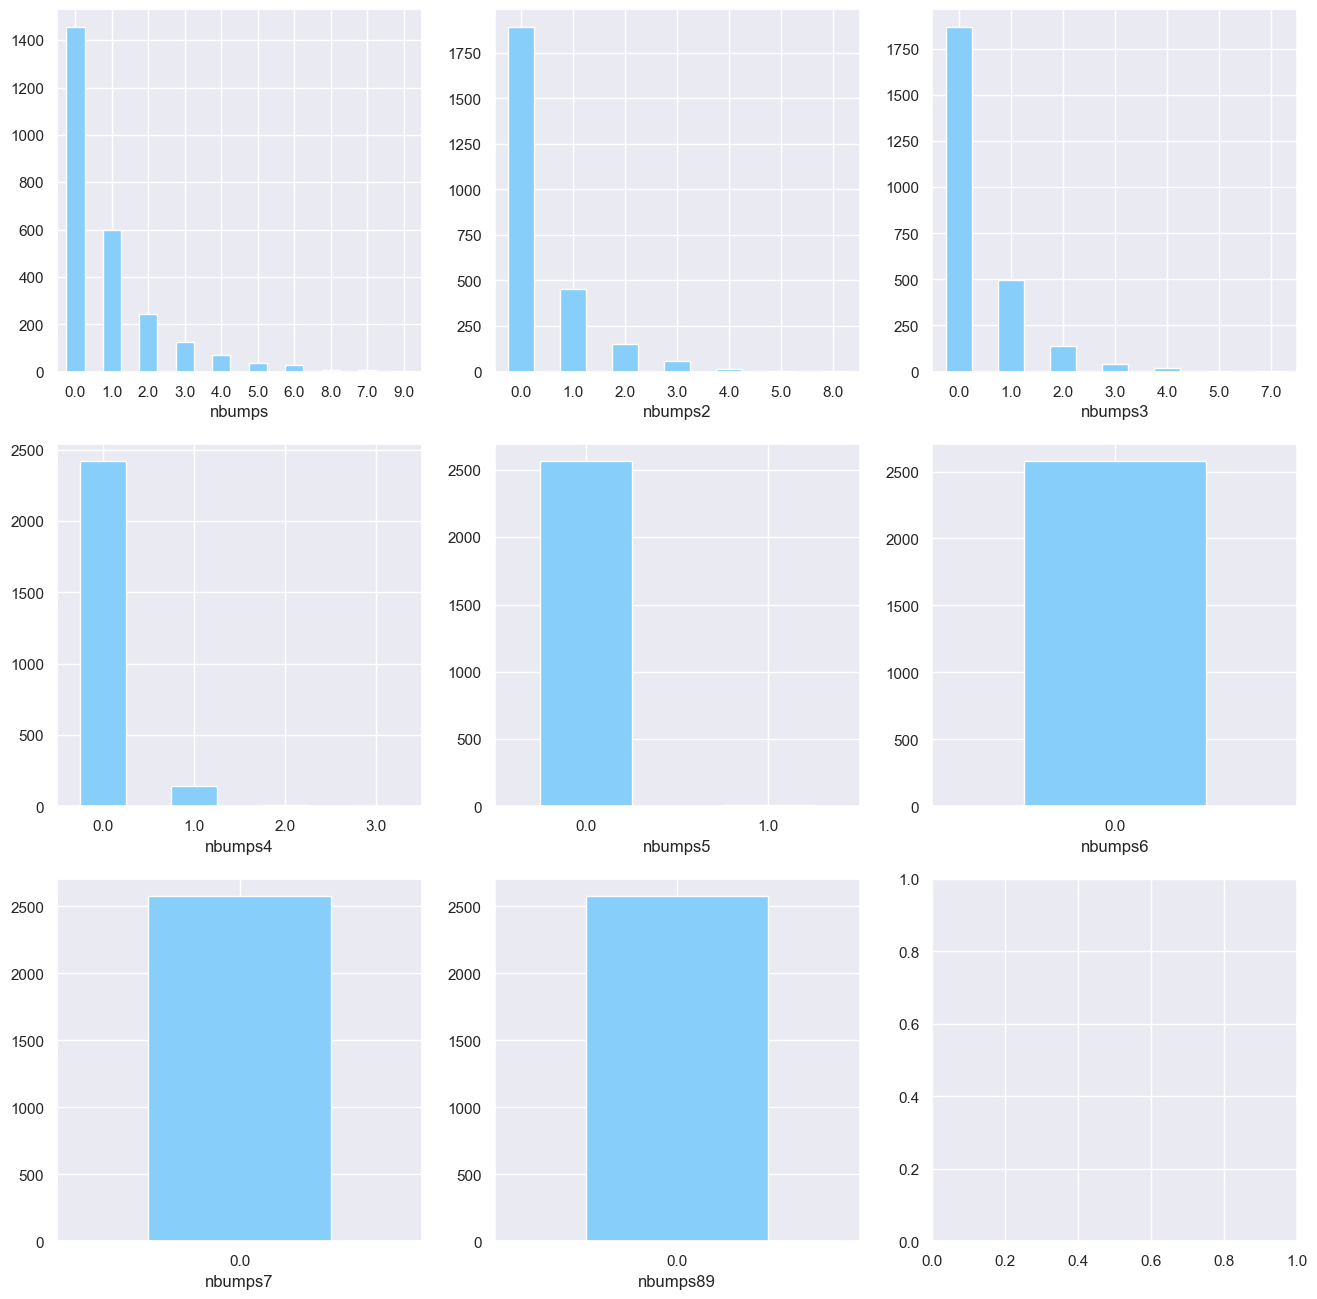

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for i, item in enumerate(discrete_features):
    if i < 3:
        figure = df[item].value_counts().plot(kind='bar', ax=axes[0,i], rot=0,color ='lightskyblue')

    elif i >= 3 and i < 6:
        figure = df[item].value_counts().plot(kind='bar', ax=axes[1,i - 3], rot=0,color ='lightskyblue')

    elif i < 9:
        figure = df[item].value_counts().plot(kind='bar', ax=axes[2,i - 6], rot=0,color ='lightskyblue')
    #figure.set_title(item)
plt.show()

#### nbumps6, nbumps7, and nbumps89 have zero values for all samples, so they can be dropped as they do not provide any information

In [79]:
df.drop(columns=['nbumps6','nbumps7','nbumps89'],inplace=True)

In [80]:
# updating discrete feature list

discrete_features = ['nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5']

In [81]:
# additional list for trasnformed continous features

transformed_continous_features = ['log_genergy', 'log_gpuls', 'log_shifted_gdenergy', 'log_shifted_gdpuls', 'log_shifted_energy', 'log_shifted_maxenergy']

In [82]:
df.head()

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy,...,nbumps3,nbumps4,nbumps5,risk_class,log_genergy,log_gpuls,log_shifted_gdenergy,log_shifted_gdpuls,log_shifted_energy,log_shifted_maxenergy
0,N,a,a,a,15180.0,48.0,-72.0,-72.0,0.0,0.0,...,0.0,0.0,0.0,0,9.627734,3.871201,3.218876,3.218876,0.000000,0.000000
1,N,a,a,a,14720.0,33.0,-70.0,-79.0,2000.0,2000.0,...,1.0,0.0,0.0,0,9.596962,3.496508,3.295837,2.890372,7.601402,7.601402
2,N,a,a,a,8050.0,30.0,-81.0,-78.0,0.0,0.0,...,0.0,0.0,0.0,0,8.993427,3.401197,2.772589,2.944439,0.000000,0.000000
3,N,a,a,a,28820.0,171.0,-23.0,40.0,3000.0,3000.0,...,1.0,0.0,0.0,0,10.268825,5.141664,4.304065,4.919981,8.006701,8.006701
4,N,a,a,a,12640.0,57.0,-63.0,-52.0,0.0,0.0,...,0.0,0.0,0.0,0,9.444622,4.043051,3.526361,3.806662,0.000000,0.000000


### CORRELATION MATRIX AND PAIRPLOT FOR CONTINOUS FEATURES

In [83]:
#correlation matrix for numerical features using both original and transformed ones.

corr_numeric_features = (df[continous_features]).corr()

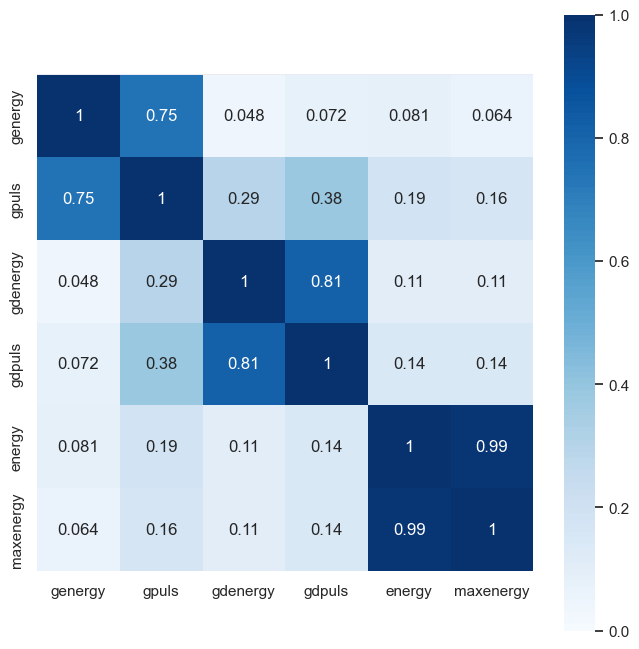

In [84]:
correlation_plot_palette = sns.mpl_palette("Blues", 100)
plt.figure(figsize=(8, 8))

sns.heatmap (data = corr_numeric_features, vmin=0, vmax=1, annot=True, square=True, cmap=correlation_plot_palette)
plt.show()

####  pairplots use transformed continous features in order to get clearer charts   

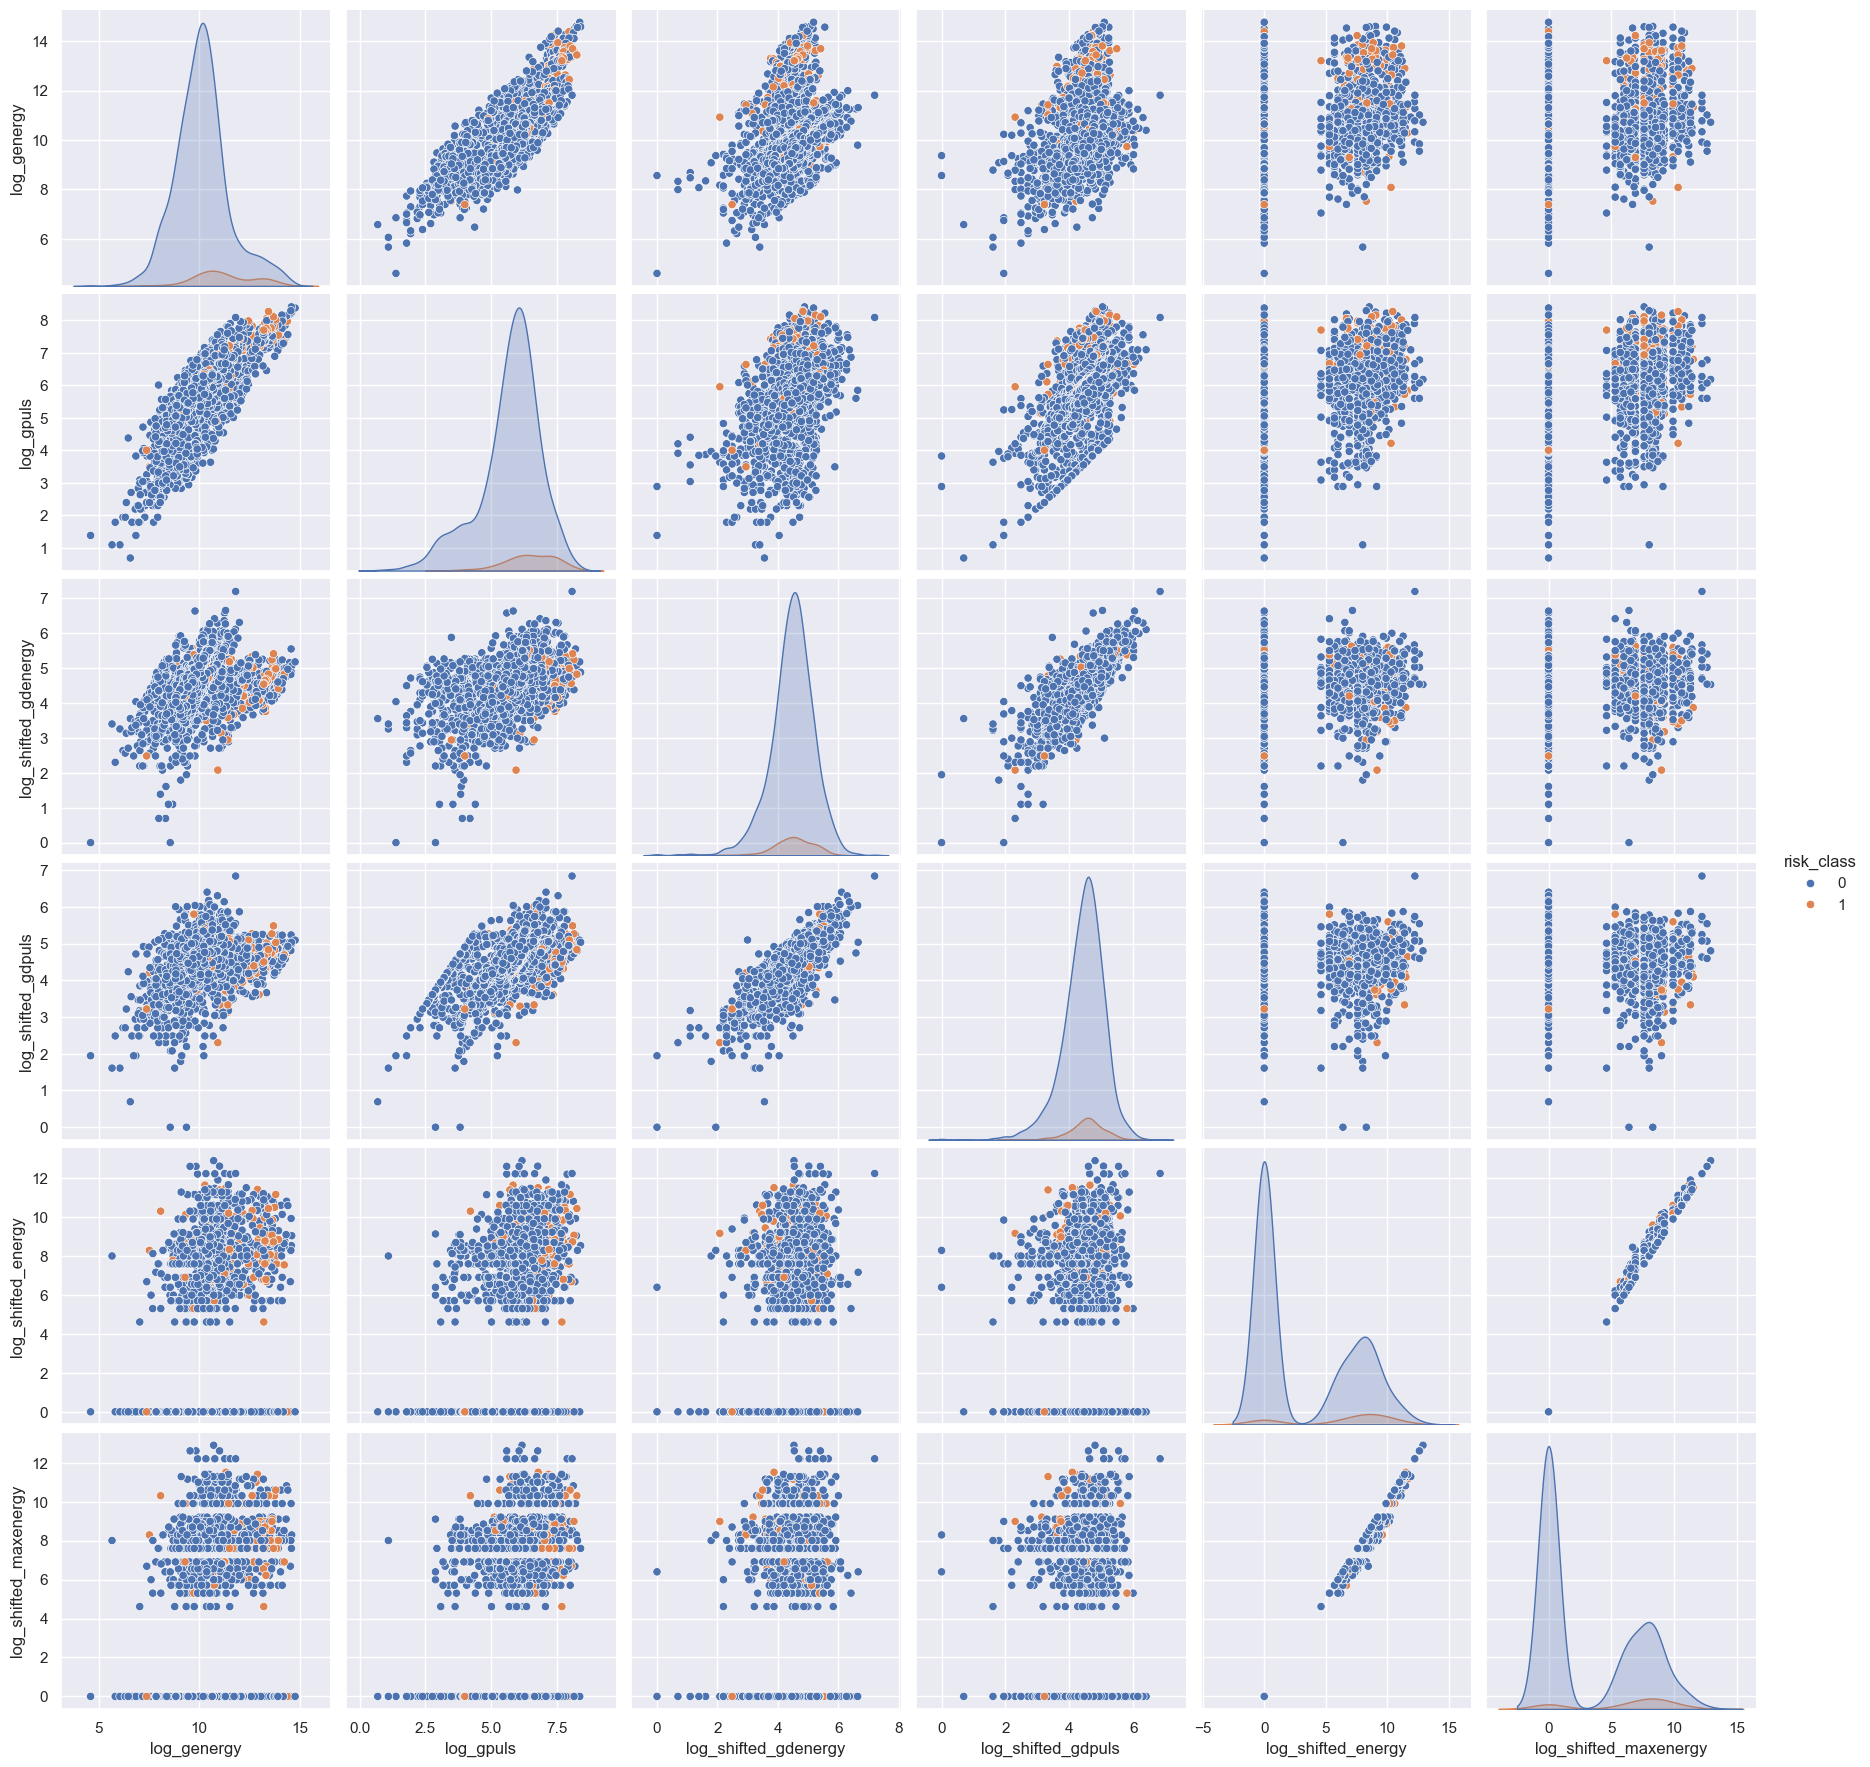

In [85]:
sns.pairplot(df[transformed_continous_features + [label]], hue=label, height=3)

#### There are pairs of features with high correlation: Genergy-Gpuls, Gdenergy-Gdpuls and Energy-Maxenergy
#### While the first two pairs take into account two aspects of the same phenomenon following the same trend, in Energy and Maxenergy the latter is directly included as a factor in the computation of the former. This explains the correlationn factor close to 1, so Maxenergy can be dropped (as well as its corresponding log_shifted_maxenergy).

In [86]:
df.drop(columns=['maxenergy','log_shifted_maxenergy'],inplace=True)

In [87]:
# updating continous feature and transformed continous feature lists

continous_features = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy']

transformed_continous_features = ['log_genergy', 'log_gpuls', 'log_shifted_gdenergy', 'log_shifted_gdpuls', 'log_shifted_energy']


### FEATURES ORDER REARRENGEMENT

In [88]:
df_log_transformed = df[categorial_features + transformed_continous_features + discrete_features + [label] ]
df = df[categorial_features + continous_features + discrete_features + [label] ]

### MULTICOLLINEARITY

#### It is evident that nbumps is multicollinear to the feature set nbumps2-nbumps5. In fact, for each sample in the dataset it represents the sum of seismic events having different energy. It is evident that nbumps is multicollinear to the feature set nbumps2-nbumps5. In fact, for each sample in the dataset, it represents the sum of seismic events having different energy, so it can be dropped.

#### VIF computation for 'nbumps' (even if multicollinearity is evident)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    numeric_df = df.select_dtypes(include=[float])
    
    # VIF computation for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.to_numpy(), i) for i in range(numeric_df.shape[1])]

print (vif_data)   

    Feature       VIF
0   genergy  2.541554
1     gpuls  3.585478
2  gdenergy  2.971234
3    gdpuls  3.066558
4    energy  7.918524
5    nbumps       inf
6   nbumps2       inf
7   nbumps3       inf
8   nbumps4       inf
9   nbumps5       inf


#### nbumps dropping

In [90]:
df.drop(columns=['nbumps'],inplace=True)

# updating discrete feature list
discrete_features = ['nbumps2', 'nbumps3', 'nbumps4', 'nbumps5']


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    numeric_df = df.select_dtypes(include=[float])
    
    # VIF computation for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.to_numpy(), i) for i in range(numeric_df.shape[1])]

    # VIF for'nbumps'
    vif_nbumps = vif_data[vif_data["Feature"] == "nbumps"]

print (vif_data)   

    Feature       VIF
0   genergy  2.541554
1     gpuls  3.585478
2  gdenergy  2.971234
3    gdpuls  3.066558
4    energy  7.918524
5   nbumps2  1.446020
6   nbumps3  1.619667
7   nbumps4  2.983997
8   nbumps5  5.552907


## 2.3 INVESTIGATION OF POSSIBLE OUTLIERS

In classification problems outliers are points that deviate significantly from the typical behavior of their  classes.


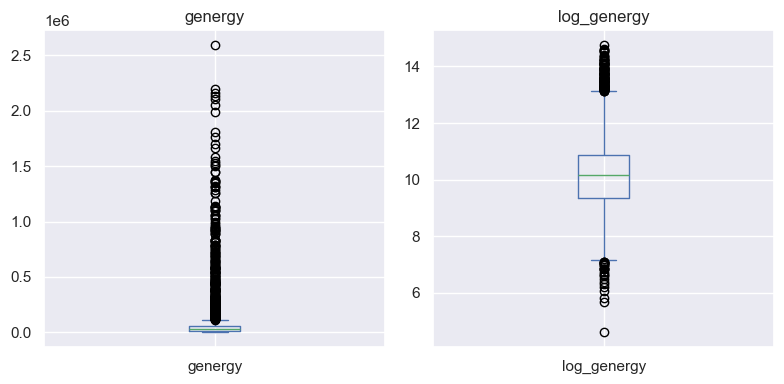

In [92]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4))  

df['genergy'].plot(kind='box', ax=axes[0], title='genergy')
df_log_transformed['log_genergy'].plot(kind='box', ax=axes[1], title='log_genergy')

plt.tight_layout()
plt.show()

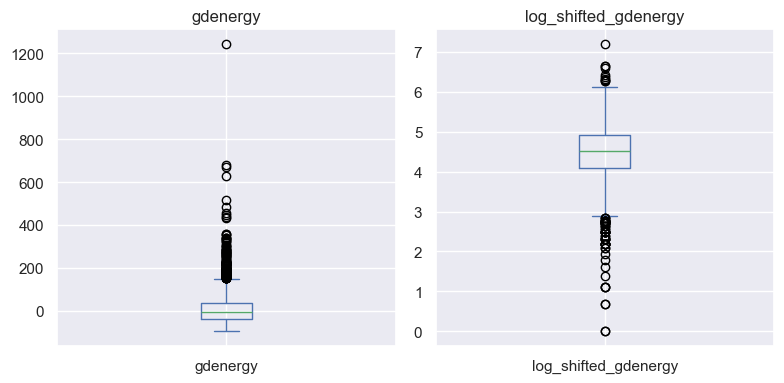

In [93]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

df['gdenergy'].plot(kind='box', ax=axes[0], title='gdenergy')
df_log_transformed['log_shifted_gdenergy'].plot(kind='box', ax=axes[1], title='log_shifted_gdenergy')

plt.tight_layout()
plt.show()

In [94]:
df[df_log_transformed['log_shifted_gdenergy'] >= 7]

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,nbumps2,nbumps3,nbumps4,nbumps5,risk_class
1683,N,a,b,b,135210.0,3261.0,1245.0,838.0,208000.0,0.0,1.0,0.0,1.0,0


In [95]:
df[df_log_transformed['log_shifted_gdenergy'] >= 6]

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,nbumps2,nbumps3,nbumps4,nbumps5,risk_class
1117,W,b,a,b,27020.0,294.0,334.0,-5.0,0.0,0.0,0.0,0.0,0.0,0
1333,W,a,b,b,32730.0,1209.0,353.0,506.0,0.0,0.0,0.0,0.0,0.0,0
1507,W,b,a,b,62880.0,826.0,338.0,99.0,700.0,1.0,0.0,0.0,0.0,0
1523,W,b,b,b,72090.0,1139.0,338.0,147.0,0.0,0.0,0.0,0.0,0.0,0
1532,W,b,b,b,75890.0,1742.0,315.0,245.0,1000.0,0.0,1.0,0.0,0.0,0
1541,W,b,b,b,90960.0,2039.0,308.0,243.0,32000.0,0.0,1.0,1.0,0.0,0
1638,N,b,b,b,38060.0,486.0,357.0,189.0,0.0,0.0,0.0,0.0,0.0,0
1645,W,b,b,b,77870.0,271.0,626.0,18.0,0.0,0.0,0.0,0.0,0.0,0
1646,W,b,b,b,82030.0,349.0,681.0,57.0,1300.0,3.0,0.0,0.0,0.0,0
1683,N,a,b,b,135210.0,3261.0,1245.0,838.0,208000.0,0.0,1.0,0.0,1.0,0


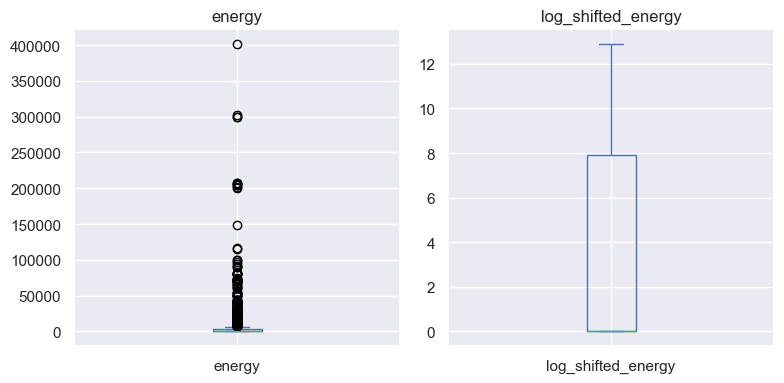

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4)) 

df['energy'].plot(kind='box', ax=axes[0], title='energy')
df_log_transformed['log_shifted_energy'].plot(kind='box', ax=axes[1], title='log_shifted_energy')

plt.tight_layout()
plt.show()

## 2.4 DATAFRAME SAVING

In [97]:

df_log_transformed.to_csv("./dataset/seismic_bumps_new_log.csv", index=False)
df.to_csv("./dataset/seismic_bumps_new.csv", index=False)

In [98]:
df.head()

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,nbumps2,nbumps3,nbumps4,nbumps5,risk_class
0,N,a,a,a,15180.0,48.0,-72.0,-72.0,0.0,0.0,0.0,0.0,0.0,0
1,N,a,a,a,14720.0,33.0,-70.0,-79.0,2000.0,0.0,1.0,0.0,0.0,0
2,N,a,a,a,8050.0,30.0,-81.0,-78.0,0.0,0.0,0.0,0.0,0.0,0
3,N,a,a,a,28820.0,171.0,-23.0,40.0,3000.0,0.0,1.0,0.0,0.0,0
4,N,a,a,a,12640.0,57.0,-63.0,-52.0,0.0,0.0,0.0,0.0,0.0,0


In [99]:
cols = df.columns.tolist()
#updating cols list 

----------------------------------------

START POINT FOR SIMULATIONS

In [100]:
df = pd.read_csv("./dataset/seismic_bumps_new.csv")

----------------------------------------

# 3. PREPROCESSING

## 3.1 OUTPUT AND  FEATURES ENCODING 

### Output encoding

In [101]:
df['risk_class'] = df['risk_class'].replace({'0': 0, '1': 1})

### Ordinal features encoding: seismic, seismoacoustic, ghazard

In [102]:
enc = OrdinalEncoder()
enc.fit(df[['seismic', 'seismoacoustic', 'ghazard']])
df[['seismic', 'seismoacoustic', 'ghazard']] = enc.transform(df[['seismic', 'seismoacoustic', 'ghazard']])

### Non ordinal features encoding: shift

In [104]:
df['shift'] = df['shift'].replace({'N': 0, 'W': 1})

In [105]:
df.head()

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,nbumps2,nbumps3,nbumps4,nbumps5,risk_class
0,0,0.0,0.0,0.0,15180.0,48.0,-72.0,-72.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0.0,14720.0,33.0,-70.0,-79.0,2000.0,0.0,1.0,0.0,0.0,0
2,0,0.0,0.0,0.0,8050.0,30.0,-81.0,-78.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0.0,0.0,0.0,28820.0,171.0,-23.0,40.0,3000.0,0.0,1.0,0.0,0.0,0
4,0,0.0,0.0,0.0,12640.0,57.0,-63.0,-52.0,0.0,0.0,0.0,0.0,0.0,0


## 3.2 DATASET SHUFFLE

### The dataset is chronologically ordered, shuffle is needed to meet IID hypothesis.

In [106]:
df = df.sample(frac=1, random_state=50).reset_index(drop=True)
df.head()

,shift,seismic,seismoacoustic,ghazard,genergy,gpuls,gdenergy,gdpuls,energy,nbumps2,nbumps3,nbumps4,nbumps5,risk_class
0,0,1.0,0.0,0.0,6450.0,112.0,-38.0,-71.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0.0,3390.0,13.0,55.0,-68.0,0.0,0.0,0.0,0.0,0.0,0
2,1,1.0,0.0,0.0,16260.0,220.0,-50.0,-50.0,3500.0,1.0,1.0,0.0,0.0,0
3,1,0.0,1.0,0.0,12150.0,361.0,-36.0,-29.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0.0,1.0,0.0,8550.0,205.0,-15.0,-11.0,0.0,0.0,0.0,0.0,0.0,0


## 3.3 DATASET PARTITIONING

### PARTITION SCHEME: 
### TRAINING SET (70%) using K-FOLD CROSS VALIDATION, FIXED DEVELOMPMENT SET (10%), FIXED TEST SET (20%)   

In [107]:

X = df[cols[:-1]].to_numpy()
t = df["risk_class"].to_numpy()


# Step 1: dataset divided into trainingValidation_&_development set and test set

X_trainVal_dev, X_test, t_trainVal_dev, t_test = train_test_split(X, t, test_size=0.2, random_state=50, stratify=t)
# stratify=t to mitigate the effect of the unbalanced dataset


# Step 2: trainingValidation_&_development dataset divided into trainingValidation set and development set
X_trainVal, X_dev, t_trainVal, t_dev = train_test_split(X_trainVal_dev, t_trainVal_dev, test_size=0.125, random_state=50, stratify=t_trainVal_dev)
# stratify=t to mitigate the effect of the unbalanced dataset



In [112]:
print( "Design matrix dimensions: ", X.shape, "\nTraining&Validation set dimensions: ", X_trainVal.shape, "\nDevelopment set dimensions: ", X_dev.shape, "\nTest set dimesions: ", X_test.shape)

Design matrix dimensions:  (2576, 13) 
Training&Validation set dimensions:  (1802, 13) 
Development set dimensions:  (258, 13) 
Test set dimesions:  (516, 13)


## NORMALIZATION

In [113]:
scaler = StandardScaler()

In [114]:
X_trainVal_scaled = scaler.fit_transform(X_trainVal)
X_dev_scaled = scaler.transform(X_dev)  # sulla parte di test vanno usate le statistiche calcolate in precedenza
X_test_scaled = scaler.transform(X_test)

# 4 MODEL SELECTION

## 4.1 LOGISTIC REGRESSION

In [115]:
print("PERFORMING MODEL SELECTION FOR LOGISTIC REGRESSION ALGORITHM\n")

# logisticRegression object creation
logreg = linear_model.LogisticRegression() 

# logaritmic grid for C parameter [0.001  0.01  0.1  1  10  100  1000] 
C_log_grid = np.logspace(-3, 3, 7)

# standard solver (lbfgs) supports only penalty l2, so liblinear solver is needed for penalty l1
grid = [
    {'C': C_log_grid, 'penalty': ['l2'], 'solver': ['lbfgs']},
    {'C': C_log_grid, 'penalty': ['l1'], 'solver': ['liblinear']}
]

# C_log_grid print
formatted_C_log_grid = [f"{x}" for x in C_log_grid]
print("Logaritmic grid for model selection: ", formatted_C_log_grid)

# stratifiedl_kfold object  to be used in cross validation 
stratified_kfold = StratifiedKFold(n_splits=5)

# logistic regression cross validation object 
logreg_cv = GridSearchCV(estimator=logreg, param_grid=grid, cv = stratified_kfold, scoring ='f1')

# cross validation procedure on validation dataset (using configuration stored into logreg_cv object)
logreg_cv.fit(X_trainVal_scaled, t_trainVal)

print("\nCROSS VALIDATION COMPLETED")
print('----------------------------------------------------------------')

print("\nTuned hyperparameters (best parameters):")
for param, value in logreg_cv.best_params_.items():
    print(f"{param}: {value}")


print("\nAdopted metric (",logreg_cv.scoring, ") best score during cross validation : %.3f \n" %(logreg_cv.best_score_) )

# predictions on training&validation set and on dev set
t_hat_trainVal = logreg_cv.predict(X_trainVal_scaled)
t_hat_dev = logreg_cv.predict(X_dev_scaled)


# metrics
print('----------------------------------------------------------------')
print("METRICS ON TRAINING & VALIDATION SET (positive label = 1)")
print('----------------------------------------------------------------')
print("f1 score: %.3f" %( f1_score(t_trainVal, t_hat_trainVal)) )
print("Precision: %.3f" % (precision_score(t_trainVal, t_hat_trainVal)) )
print("Recall: %.3f" % (recall_score(t_trainVal, t_hat_trainVal)) )
print("Accuracy: %.3f" %(accuracy_score(t_trainVal, t_hat_trainVal)) )

print('----------------------------------------------------------------')
print("METRICS ON DEVELOPMENT SET (positive label = 1)")
print('----------------------------------------------------------------')

print("f1 score : %.3f" %(f1_score(t_dev, t_hat_dev) ))
print("Precision : %.3f" % (precision_score(t_dev, t_hat_dev)))
print("Recall : %.3f" % (recall_score(t_dev, t_hat_dev)))
print("Accuracy: %.3f" %(accuracy_score(t_dev, t_hat_dev) ))


PERFORMING MODEL SELECTION FOR LOGISTIC REGRESSION ALGORITHM

Logaritmic grid for model selection:  ['0.001', '0.01', '0.1', '1.0', '10.0', '100.0', '1000.0']

CROSS VALIDATION COMPLETED
----------------------------------------------------------------

Tuned hyperparameters (best parameters):
C: 1.0
penalty: l2
solver: lbfgs

Adopted metric ( f1 ) best score during cross validation : 0.061 

----------------------------------------------------------------
METRICS ON TRAINING & VALIDATION SET (positive label = 1)
----------------------------------------------------------------
f1 score: 0.062
Precision: 0.364
Recall: 0.034
Accuracy: 0.933
----------------------------------------------------------------
METRICS ON DEVELOPMENT SET (positive label = 1)
----------------------------------------------------------------
f1 score : 0.000
Precision : 0.000
Recall : 0.000
Accuracy: 0.922


## 4.2 K-NN CLASSIFIER 

In [116]:
print("PERFORMING MODEL SELECTION FOR K-NN CLASSIFIER ALGORITHM\n")

# K-NN Classifier object creation
knn_classifier = KNeighborsClassifier()

neighbors_list = range(1, 10, 2)

grid = {
    'n_neighbors': neighbors_list  
}

# stratifiedl_kfold object  to be used in cross validation 
stratified_kfold = StratifiedKFold(n_splits=5)


# KNN cross validation object 
knn_cv = GridSearchCV(estimator = knn_classifier,  param_grid=grid, cv = stratified_kfold, scoring ='f1')


# K-NN does not require an explicit training process; it uses the stored data to calculate distances.
knn_cv.fit(X_trainVal_scaled, t_trainVal)  

  
print("\nCROSS VALIDATION COMPLETED")
print('----------------------------------------------------------------')
print("\nTuned hyperparameters (best parameters): ",knn_cv.best_params_)
print("\nAdopted metric (",knn_cv.scoring,") best score during cross validation : %.3f\n" %(knn_cv.best_score_))


# predictions on training&validation set and on dev set
t_hat_trainVal = knn_cv.predict(X_trainVal_scaled)
t_hat_dev = knn_cv.predict(X_dev_scaled)

# metrics
print('----------------------------------------------------------------')
print("METRICS ON TRAINING & VALIDATION SET (positive label = 1)")
print('----------------------------------------------------------------')
print("f1 score: %.3f" %( f1_score(t_trainVal, t_hat_trainVal)) )
print("Precision: %.3f" % (precision_score(t_trainVal, t_hat_trainVal)) )
print("Recall: %.3f" % (recall_score(t_trainVal, t_hat_trainVal)) )
print("Accuracy: %.3f" %(accuracy_score(t_trainVal, t_hat_trainVal)) )

print('----------------------------------------------------------------')
print("METRICS ON DEVELOPMENT SET (positive label = 1)")
print('----------------------------------------------------------------')

print("f1 score : %.3f" %(f1_score(t_dev, t_hat_dev) ))
print("Precision : %.3f" % (precision_score(t_dev, t_hat_dev)))
print("Recall : %.3f" % (recall_score(t_dev, t_hat_dev)))
print("Accuracy: %.3f" %(accuracy_score(t_dev, t_hat_dev) ))


PERFORMING MODEL SELECTION FOR K-NN CLASSIFIER ALGORITHM


CROSS VALIDATION COMPLETED
----------------------------------------------------------------

Tuned hyperparameters (best parameters):  {'n_neighbors': 1}

Adopted metric ( f1 ) best score during cross validation : 0.187

----------------------------------------------------------------
METRICS ON TRAINING & VALIDATION SET (positive label = 1)
----------------------------------------------------------------
f1 score: 1.000
Precision: 1.000
Recall: 1.000
Accuracy: 1.000
----------------------------------------------------------------
METRICS ON DEVELOPMENT SET (positive label = 1)
----------------------------------------------------------------
f1 score : 0.235
Precision : 0.235
Recall : 0.235
Accuracy: 0.899


In [117]:
print("PERFORMING MODEL SELECTION FOR K-NN CLASSIFIER ALGORITHM\n")

# K-NN Classifier object creation
knn_classifier = KNeighborsClassifier()

neighbors_list = range(3, 10, 2)

grid = {
    'n_neighbors': neighbors_list  
}

# stratifiedl_kfold object  to be used in cross validation 
stratified_kfold = StratifiedKFold(n_splits=5)


# KNN cross validation object 
knn_cv = GridSearchCV(estimator = knn_classifier,  param_grid=grid, cv = stratified_kfold, scoring ='f1')


# K-NN does not require an explicit training process; it uses the stored data to calculate distances.
knn_cv.fit(X_trainVal_scaled, t_trainVal)  

  
print("\nCROSS VALIDATION COMPLETED")
print('----------------------------------------------------------------')
print("\nTuned hyperparameters (best parameters): ",knn_cv.best_params_)
print("\nAdopted metric (",knn_cv.scoring,") best score during cross validation : %.3f\n" %(knn_cv.best_score_))


# predictions on training&validation set and on dev set
t_hat_trainVal = knn_cv.predict(X_trainVal_scaled)
t_hat_dev = knn_cv.predict(X_dev_scaled)

# metrics
print('----------------------------------------------------------------')
print("METRICS ON TRAINING & VALIDATION SET (positive label = 1)")
print('----------------------------------------------------------------')
print("f1 score: %.3f" %( f1_score(t_trainVal, t_hat_trainVal)) )
print("Precision: %.3f" % (precision_score(t_trainVal, t_hat_trainVal)) )
print("Recall: %.3f" % (recall_score(t_trainVal, t_hat_trainVal)) )
print("Accuracy: %.3f" %(accuracy_score(t_trainVal, t_hat_trainVal)) )

print('----------------------------------------------------------------')
print("METRICS ON DEVELOPMENT SET (positive label = 1)")
print('----------------------------------------------------------------')

print("f1 score : %.3f" %(f1_score(t_dev, t_hat_dev) ))
print("Precision : %.3f" % (precision_score(t_dev, t_hat_dev)))
print("Recall : %.3f" % (recall_score(t_dev, t_hat_dev)))
print("Accuracy: %.3f" %(accuracy_score(t_dev, t_hat_dev) ))


PERFORMING MODEL SELECTION FOR K-NN CLASSIFIER ALGORITHM


CROSS VALIDATION COMPLETED
----------------------------------------------------------------

Tuned hyperparameters (best parameters):  {'n_neighbors': 3}

Adopted metric ( f1 ) best score during cross validation : 0.153

----------------------------------------------------------------
METRICS ON TRAINING & VALIDATION SET (positive label = 1)
----------------------------------------------------------------
f1 score: 0.440
Precision: 0.740
Recall: 0.314
Accuracy: 0.948
----------------------------------------------------------------
METRICS ON DEVELOPMENT SET (positive label = 1)
----------------------------------------------------------------
f1 score : 0.250
Precision : 0.429
Recall : 0.176
Accuracy: 0.930


## 4.3 SUPPORT VECTOR MACHINE

In [118]:
from sklearn.svm import SVC


print("PERFORMING MODEL SELECTION FOR SVM ALGORITHM...\n")

# Support Vector Classifier creation
svc = SVC()

# Dictionary for parameters exploration
parameters =[
    {'C': [0.001, 0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1]},
    {'C': [0.001, 0.1, 1, 10], 'kernel': ['poly'], 'gamma': [0.01, 0.1, 1] ,'degree':[2,3]},
    {'C': [0.001, 0.1, 1, 10], 'kernel': ['sigmoid'], 'gamma': [0.01, 0.1, 1]}
]

stratified_kfold = StratifiedKFold(n_splits=5)

svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, scoring='f1', cv=stratified_kfold, verbose=1)

svc_cv.fit(X_trainVal_scaled, t_trainVal)

print("\nCROSS VALIDATION COMPLETED")
print('----------------------------------------------------------------')

print("\nTuned hyperparameters (best parameters):")
for param, value in svc_cv.best_params_.items():
    print(f"{param}: {value}")


print("\nAdopted metric (",svc_cv.scoring, ") best score during cross validation : %.3f \n" %(svc_cv.best_score_) )

# predictions on training&validation set and on dev set
t_hat_trainVal = svc_cv.predict(X_trainVal_scaled)
t_hat_dev = svc_cv.predict(X_dev_scaled)

# metrics
print('----------------------------------------------------------------')
print("METRICS ON TRAINING & VALIDATION SET (positive label = 1)")
print('----------------------------------------------------------------')
print("f1 score: %.3f" %( f1_score(t_trainVal, t_hat_trainVal)) )
print("Precision: %.3f" % (precision_score(t_trainVal, t_hat_trainVal)) )
print("Recall: %.3f" % (recall_score(t_trainVal, t_hat_trainVal)) )
print("Accuracy: %.3f" %(accuracy_score(t_trainVal, t_hat_trainVal)) )

print('----------------------------------------------------------------')
print("METRICS ON DEVELOPMENT SET (positive label = 1)")
print('----------------------------------------------------------------')

print("f1 score : %.3f" %(f1_score(t_dev, t_hat_dev) ))
print("Precision : %.3f" % (precision_score(t_dev, t_hat_dev)))
print("Recall : %.3f" % (recall_score(t_dev, t_hat_dev)))
print("Accuracy: %.3f" %(accuracy_score(t_dev, t_hat_dev) ))

PERFORMING MODEL SELECTION FOR SVM ALGORITHM...

Fitting 5 folds for each of 48 candidates, totalling 240 fits

CROSS VALIDATION COMPLETED
----------------------------------------------------------------

Tuned hyperparameters (best parameters):
C: 1
degree: 3
gamma: 1
kernel: poly

Adopted metric ( f1 ) best score during cross validation : 0.223 

----------------------------------------------------------------
METRICS ON TRAINING & VALIDATION SET (positive label = 1)
----------------------------------------------------------------
f1 score: 0.765
Precision: 0.962
Recall: 0.636
Accuracy: 0.974
----------------------------------------------------------------
METRICS ON DEVELOPMENT SET (positive label = 1)
----------------------------------------------------------------
f1 score : 0.167
Precision : 0.286
Recall : 0.118
Accuracy: 0.922


In [119]:
# List to store evaluable cases
evaluable_cases = []
# Loop through each set of parameters for investigation
for params,mean_test_score in zip(svc_cv.cv_results_['params'],svc_cv.cv_results_['mean_test_score']) :
    # Check conditions
    if mean_test_score > 0.15:
        evaluable_cases.append((params, mean_test_score))

# Print evaluable cases
if evaluable_cases:
    print('===================================================================')
    print("\nEvaluable cases found:")
    print('===================================================================')
    for params, mean_f1_test_score in evaluable_cases:
        print(f"Parameters: {params}")
        print(f"F1 score (CV mean): {mean_f1_test_score:.3f}")
        print('------------------------------------------------------------------')
else:
    print('===================================================================')
    print("\nNo evaluable cases found.")
    print('===================================================================')



Evaluable cases found:
Parameters: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
F1 score (CV mean): 0.176
------------------------------------------------------------------
Parameters: {'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
F1 score (CV mean): 0.223
------------------------------------------------------------------
Parameters: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
F1 score (CV mean): 0.179
------------------------------------------------------------------
Parameters: {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
F1 score (CV mean): 0.192
------------------------------------------------------------------
Parameters: {'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}
F1 score (CV mean): 0.193
------------------------------------------------------------------
Parameters: {'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}
F1 score (CV mean): 0.169
------------------------------------------------------------------


In [120]:
print("PERFORMING MODEL SELECTION FOR SVM ALGORITHM...\n")

# Support Vector Classifier creation
svc = SVC()

# Dictionary for parameters exploration
parameters =[

    {'C':      [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 
                0.01,  0.02,  0.03,  0.04,  0.05,  0.06, 0.07,  0.08,  0.09],
     'kernel': ['poly'], 
     'gamma':  [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,
     'degree': [3,4]},
]


stratified_kfold = StratifiedKFold(n_splits=5)

svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, scoring='f1', cv=stratified_kfold, verbose=1)

svc_cv.fit(X_trainVal_scaled, t_trainVal)

print("\nCROSS VALIDATION COMPLETED")
print('----------------------------------------------------------------')

print("\nTuned hyperparameters (best parameters):")
for param, value in svc_cv.best_params_.items():
    print(f"{param}: {value}")


print("\nAdopted metric (",svc_cv.scoring, ") best score during cross validation : %.3f \n" %(svc_cv.best_score_) )


# predictions on training&validation set and on dev set
t_hat_trainVal = svc_cv.predict(X_trainVal_scaled)
t_hat_dev = svc_cv.predict(X_dev_scaled)


# metrics
print('----------------------------------------------------------------')
print("METRICS ON TRAINING & VALIDATION SET (positive label = 1)")
print('----------------------------------------------------------------')
print("f1 score: %.3f" %( f1_score(t_trainVal, t_hat_trainVal)) )
print("Precision: %.3f" % (precision_score(t_trainVal, t_hat_trainVal)) )
print("Recall: %.3f" % (recall_score(t_trainVal, t_hat_trainVal)) )
print("Accuracy: %.3f" %(accuracy_score(t_trainVal, t_hat_trainVal)) )

print('----------------------------------------------------------------')
print("METRICS ON DEVELOPMENT SET (positive label = 1)")
print('----------------------------------------------------------------')

print("f1 score : %.3f" %(f1_score(t_dev, t_hat_dev) ))
print("Precision : %.3f" % (precision_score(t_dev, t_hat_dev)))
print("Recall : %.3f" % (recall_score(t_dev, t_hat_dev)))
print("Accuracy: %.3f" %(accuracy_score(t_dev, t_hat_dev) ))


PERFORMING MODEL SELECTION FOR SVM ALGORITHM...

Fitting 5 folds for each of 684 candidates, totalling 3420 fits

CROSS VALIDATION COMPLETED
----------------------------------------------------------------

Tuned hyperparameters (best parameters):
C: 0.06
degree: 4
gamma: 0.8
kernel: poly

Adopted metric ( f1 ) best score during cross validation : 0.256 

----------------------------------------------------------------
METRICS ON TRAINING & VALIDATION SET (positive label = 1)
----------------------------------------------------------------
f1 score: 0.814
Precision: 1.000
Recall: 0.686
Accuracy: 0.979
----------------------------------------------------------------
METRICS ON DEVELOPMENT SET (positive label = 1)
----------------------------------------------------------------
f1 score : 0.276
Precision : 0.333
Recall : 0.235
Accuracy: 0.919


# 5 MODEL ASSESMENT 

#### Selected algorithm: SVM (C: 0.06, degree: 4, gamma: 0.8, kernel: poly) even if model is still overfitting with parameters found during cross-validation

In [132]:
X_training_scaled = np.concatenate((X_trainVal_scaled, X_dev_scaled), axis=0)
t_training = np.concatenate((t_trainVal, t_dev), axis=0)

In [133]:
print( "Matrix dimensions: ", "\nTraining set dimensions: ", X_training_scaled.shape, "\nTest set dimesions: ", X_test_scaled.shape)

Matrix dimensions:  
Training set dimensions:  (2060, 13) 
Test set dimesions:  (516, 13)


In [134]:

svc = SVC(C=0.06, degree=4, gamma=0.8, kernel="poly")

svc.fit(X_training_scaled, t_training)

print("Training completed!")

Training completed!


In [135]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

t_hat_training = svc.predict(X_training_scaled)
t_hat_test = svc.predict(X_test_scaled)

# metrics
print('----------------------------------------------------------------')
print("METRICS ON TRAINING SET (positive label = 1)")
print('----------------------------------------------------------------')
print("f1 score: %.3f" %( f1_score(t_training, t_hat_training)) )
print("Precision: %.3f" % precision_score(t_training, t_hat_training))
print("Recall: %.3f" % recall_score(t_training, t_hat_training))
print("Accuracy: %.3f" %(accuracy_score(t_training, t_hat_training)))


print('----------------------------------------------------------------')
print("METRICS ON TEST SET (positive label = 1)")
print('----------------------------------------------------------------')

print("f1 score : %.3f" %(f1_score(t_test, t_hat_test)) )
print("Precision : %.3f" % precision_score(t_test, t_hat_test))
print("Recall : %.3f" % recall_score(t_test, t_hat_test))
print("Accuracy: %.3f" %(accuracy_score(t_test, t_hat_test)) )


----------------------------------------------------------------
METRICS ON TRAINING SET (positive label = 1)
----------------------------------------------------------------
f1 score: 0.795
Precision: 1.000
Recall: 0.659
Accuracy: 0.978
----------------------------------------------------------------
METRICS ON TEST SET (positive label = 1)
----------------------------------------------------------------
f1 score : 0.258
Precision : 0.286
Recall : 0.235
Accuracy: 0.911


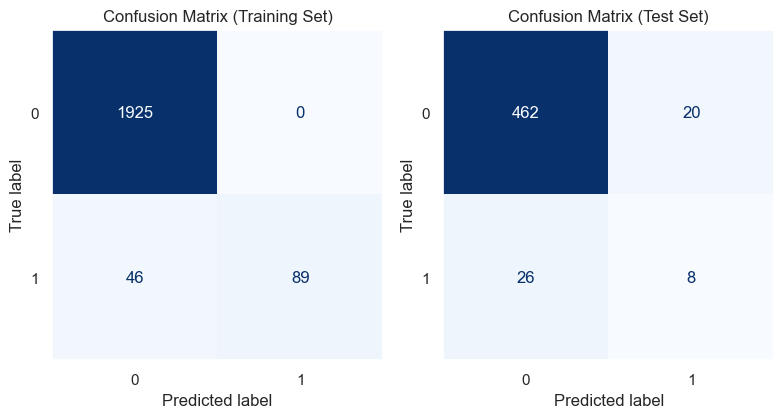

In [138]:
# Confusion Matrix training set
conf_matrix_training = confusion_matrix(t_training, t_hat_training)
# Confusion Matrix test set
conf_matrix_test = confusion_matrix(t_test, t_hat_test)

# subplots cration
fig, axes = plt.subplots(1, 2, figsize=(8,10))  # 1 riga, 2 colonne, dimensione della figura

# Confusion Matrix Training Set
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_training)
disp_train.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Confusion Matrix (Training Set)')

# remove internal grid
axes[0].grid(False)

# Confusion Matrix  Test Set
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp_test.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('Confusion Matrix (Test Set)')

# remove internal grid
axes[1].grid(False)


plt.tight_layout()
plt.show()

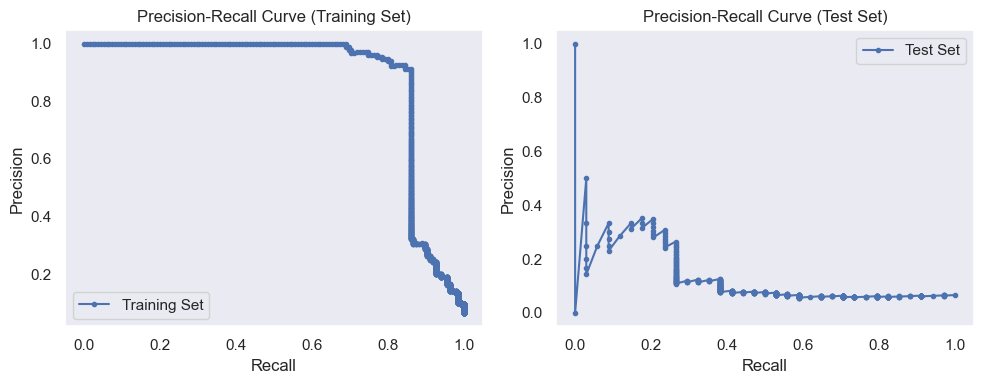

In [139]:
# Precision-Recall training set
probs_training = svc.decision_function(X_training_scaled)
precision_train, recall_train, threshold = precision_recall_curve(t_training, probs_training)

# Precision-Recall Curve test set
probs_test = svc.decision_function(X_test_scaled)
precision_test, recall_test, threshold = precision_recall_curve(t_test, probs_test)

# subplots
plt.figure(figsize=(10, 4))

# Precision-Recall Curve (Training Set)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, forst plot
plt.plot(recall_train, precision_train, marker='.', label='Training Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Training Set)')
plt.legend()
plt.grid()

# Precision-Recall Curve (Test Set)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(recall_test, precision_test, marker='.', label='Test Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend()
plt.grid()

# show plots
plt.tight_layout()
plt.show()
